<a href="https://colab.research.google.com/github/Saadman53/Thesis-Human-Activity-Recognition/blob/main/Decision_Level_Fusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
sensor_preds_path = "drive/My Drive/Dataset/sensor_predictions.mat"
prewitt_preds_path = "drive/My Drive/Dataset/alexnet_prewitt_predictions.mat"
sobel_preds_path = "drive/My Drive/Dataset/alexnet_sobel_predictions.mat"

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.functional as F
from torch.utils import data

import torchvision
import torchvision.transforms as transforms



import random
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report


from torch.utils.data import DataLoader, ConcatDataset
# from torchvision import transforms
from sklearn.model_selection  import StratifiedKFold

import torch.optim.lr_scheduler as lr_scheduler
%matplotlib inline

import scipy.io as sio
torch.autograd.set_detect_anomaly(True)


from functools import partial
from typing import Any, Optional

import torch
import torch.nn as nn


In [3]:
y_pred_sens = torch.tensor(sio.loadmat(sensor_preds_path)['preds'])
y_pred_prewitt = torch.tensor(sio.loadmat(prewitt_preds_path)['preds'])
y_pred_sobel = torch.tensor(sio.loadmat(sobel_preds_path)['preds'])
y_test = sio.loadmat(prewitt_preds_path)['y_test']

In [4]:
y_pred_prewitt_sens = y_pred_sens+y_pred_prewitt
y_pred_sobel_sens = y_pred_sens+y_pred_sobel

In [5]:
def cf_matrix(y_pred, test_y):
  y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
  _, y_pred = torch.max(y_pred_softmax, dim = 1)
  y_pred = y_pred.detach().numpy().ravel()
  correct_pred = (y_pred == test_y).astype(np.float)[0]
  acc = correct_pred.sum()*100.0 / y_pred.shape[0]
  cm = confusion_matrix(test_y.ravel(), y_pred)
  recall = np.mean(recall_score(test_y.ravel(), y_pred, average=None))*100.0
  precision = np.mean(precision_score(test_y.ravel(), y_pred, average=None))*100.0
  f,ax=plt.subplots(figsize=(20,10))
  sns.heatmap(cm,annot=True,fmt='.0f', cmap="Blues")
  print(f"Accuracy: {acc:.2f}%")
  print(f"Precision: {precision:.2f}%")
  print(f"Recall: {recall:.2f}%")
  plt.ylabel('Actual Values')
  plt.xlabel('Predicted Values')
  plt.show()
  return cm,acc, recall, precision

Accuracy: 99.71%
Precision: 99.73%
Recall: 99.72%


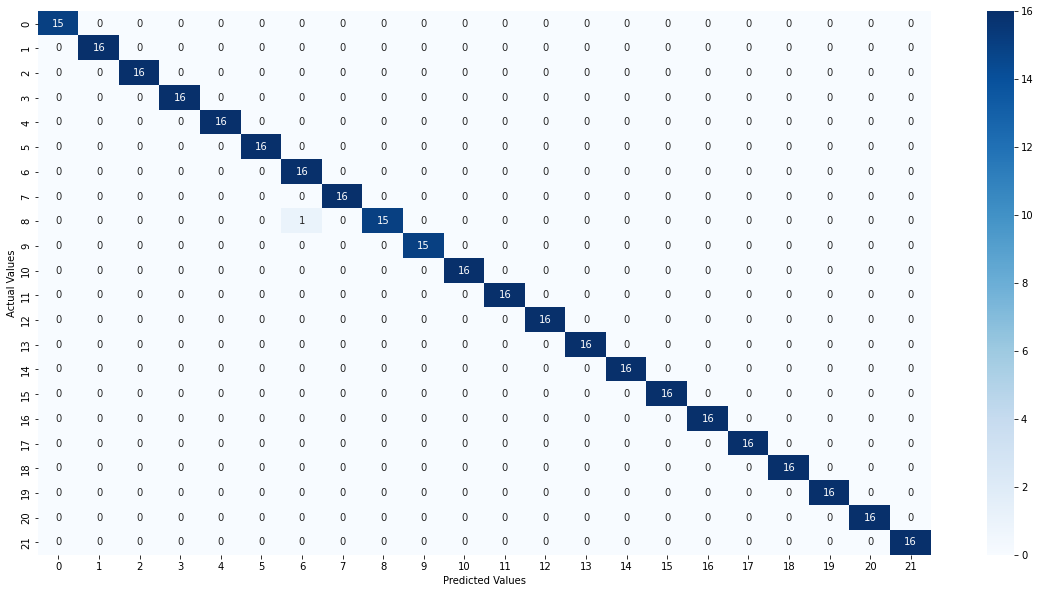

In [6]:
cm,acc, recall, precision = cf_matrix(y_pred_prewitt_sens, y_test)

Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%


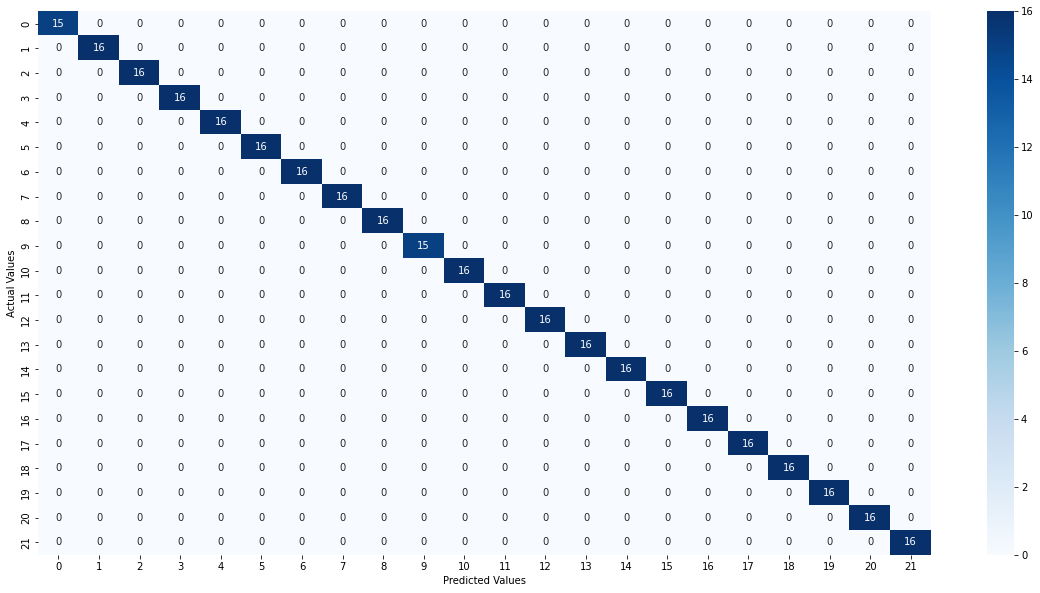

In [7]:
cm,acc, recall, precision = cf_matrix(y_pred_sobel_sens, y_test)